In [1]:
from unicodedata import name
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

url = 'https://www.fantasypros.com/nfl/stats/wr.php'
html = urlopen(url)
statsPage = BeautifulSoup(html)

     Nums  Rank                 Player  AGE  REC  TGT   YDS   Y/R  LG  20+  \
0      31    32      A.J. Brown (TEN)    25   63  105   869  13.8  57    0   
1      41    42      A.J. Green (ARI)    26   54   92   848  15.7  42    0   
2     109   110  Adam Humphries (WAS)    29   41   62   383   9.3  27    0   
3      26    27    Adam Thielen (MIN)    30   67   95   726  10.8  35    0   
4     133   134   Albert Wilson (MIA)    29   25   39   213   8.5  64    0   
..    ...   ...                    ...  ...  ...  ...   ...   ...  ..  ...   
150    10    11   Tyler Lockett (SEA)    29   73  107  1175  16.1  69    0   
151     6     7     Tyreek Hill (MIA)    28  111  159  1239  11.2  75    0   
152    30    31   Van Jefferson (LAR)    26   50   89   802  16.0  79    0   
153    81    82     Zach Pascal (PHI)    28   38   69   384  10.1  41    0   
154    75    76       Zay Jones (JAC)    24   47   70   546  11.6  43    0   

     ...  ATT  YDS.1  TD.1  FL   G   FPTS  FPTS/G     ROST     

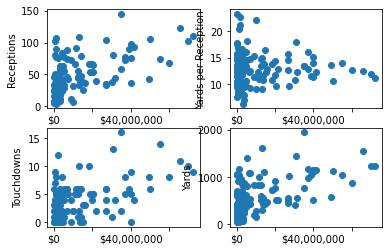

In [4]:

fulldf = pd.read_csv('C:/Users/tyler/Downloads/CONTROL.csv')
fulldf = fulldf.dropna()
fulldf = fulldf.astype({'YDS': int})
print(fulldf)

x = fulldf['Money']
y1 = fulldf['REC']
y2 = fulldf['YDS']
y3 = fulldf['TD']
y4 = fulldf['Y/R']


#fig, ax = plt.subplots()

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_ylabel('Receptions')
ax2= fig.add_subplot(222)
ax2.set_ylabel('Yards per Reception')
ax3= fig.add_subplot(223)
ax3.set_ylabel('Touchdowns')
ax4= fig.add_subplot(224)
ax4.set_ylabel('Yards')
ax1.scatter(x, y1)
ax2.scatter(x, y4)
ax3.scatter(x, y3)
ax4.scatter(x, y2)
ind = np.arange(8)

#ax.set_xlabel('Contract Worth($')
#ax.set_ylabel('Receptions')

#plt.scatter(x,y1)
myLocator = mticker.MultipleLocator(4)

ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax2.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax3.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
for label in ax2.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax1.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax3.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax4.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

In [5]:
controldf = fulldf[fulldf.Age>27]

AttributeError: 'DataFrame' object has no attribute 'Age'

In [6]:
fulldf = fulldf[fulldf.AGE>27]

In [8]:
import statsmodels.formula.api as smf
estTD = smf.ols('Money ~ TD', fulldf).fit()
estTD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     50.83
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.20e-09
Time:                        21:42:53   Log-Likelihood:                -879.02
No. Observations:                  49   AIC:                             1762.
Df Residuals:                      47   BIC:                             1766.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.795e+05   3.24e+06      0.117      0.907   -6.13e+06    6.89e+06
TD           4.24e+06   5.95e+05      7.130      0.000    3.04e+06    5.44e+06
==============================================================================
Omnibus:                        4.340   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.480
Skew:                           0.642   Prob(JB):                        0.176
Kurtosis:                       3.242   Cond. No.                         8.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
estREC = smf.ols('Money ~ REC', fulldf).fit()
estREC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     72.77
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           4.16e-11
Time:                        21:43:07   Log-Likelihood:                -874.07
No. Observations:                  49   AIC:                             1752.
Df Residuals:                      47   BIC:                             1756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.682e+06   3.45e+06     -1.939      0.058   -1.36e+07     2.5e+05
REC         5.177e+05   6.07e+04      8.530      0.000    3.96e+05     6.4e+05
==============================================================================
Omnibus:                        3.539   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.512
Skew:                           0.386   Prob(JB):                        0.285
Kurtosis:                       3.797   Cond. No.                         99.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
estREC = smf.ols('Money ~ REC', fulldf).fit()
estREC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     72.77
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           4.16e-11
Time:                        21:44:18   Log-Likelihood:                -874.07
No. Observations:                  49   AIC:                             1752.
Df Residuals:                      47   BIC:                             1756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.682e+06   3.45e+06     -1.939      0.058   -1.36e+07     2.5e+05
REC         5.177e+05   6.07e+04      8.530      0.000    3.96e+05     6.4e+05
==============================================================================
Omnibus:                        3.539   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.512
Skew:                           0.386   Prob(JB):                        0.285
Kurtosis:                       3.797   Cond. No.                         99.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
estYDS = smf.ols('Money ~ YDS', fulldf).fit()
estYDS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     77.76
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.58e-11
Time:                        21:47:41   Log-Likelihood:                -873.07
No. Observations:                  49   AIC:                             1750.
Df Residuals:                      47   BIC:                             1754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.12e+06   3.39e+06     -2.102      0.041   -1.39e+07   -3.04e+05
YDS         4.241e+04   4809.593      8.818      0.000    3.27e+04    5.21e+04
==============================================================================
Omnibus:                        4.562   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.573
Skew:                           0.246   Prob(JB):                        0.102
Kurtosis:                       4.413   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
estTDS = smf.ols('Money ~ TD', fulldf).fit()
estTDS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Money   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     50.83
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.20e-09
Time:                        22:04:18   Log-Likelihood:                -879.02
No. Observations:                  49   AIC:                             1762.
Df Residuals:                      47   BIC:                             1766.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.795e+05   3.24e+06      0.117      0.907   -6.13e+06    6.89e+06
TD           4.24e+06   5.95e+05      7.130      0.000    3.04e+06    5.44e+06
==============================================================================
Omnibus:                        4.340   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.480
Skew:                           0.642   Prob(JB):                        0.176
Kurtosis:                       3.242   Cond. No.                         8.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""